In [56]:
import numpy as np
import pandas as pd
import scipy as sp
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Input, InputLayer
from tensorflow.keras.models import Sequential
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

**Building an image classifier using the sequential API**

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X, y), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X.shape

(60000, 28, 28)

In [5]:
X_validation, X_train = X[50000:]/255, X[:50000]/255
y_validation, y_train = y[50000:], y[:50000]

In [6]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics=["accuracy"])

In [7]:
model.summary()
model.layers
weights, biases = model.layers[1].get_weights()
weights
biases

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, y_validation))

Epoch 1/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.7446 - accuracy: 0.7591 - val_loss: 0.5327 - val_accuracy: 0.8174
Epoch 2/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4929 - accuracy: 0.8288 - val_loss: 0.5604 - val_accuracy: 0.8008
Epoch 3/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4472 - accuracy: 0.8441 - val_loss: 0.4516 - val_accuracy: 0.8424
Epoch 4/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4201 - accuracy: 0.8534 - val_loss: 0.4265 - val_accuracy: 0.8534
Epoch 5/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4001 - accuracy: 0.8605 - val_loss: 0.4092 - val_accuracy: 0.8551
Epoch 6/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3840 - accuracy: 0.8653 - val_loss: 0.3927 - val_accuracy: 0.8602
Epoch 7/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3710 - accuracy: 0.8685 - val_loss: 0.3872 - val_accuracy:

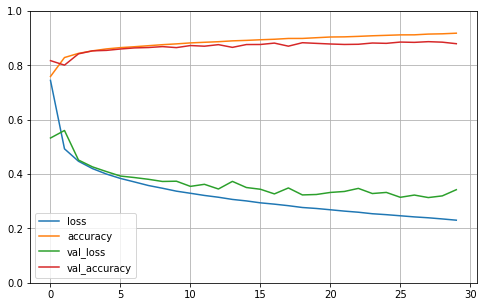

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 80.3591 - accuracy: 0.8278


[80.3591079711914, 0.8277999758720398]

In [11]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [13]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

**Building a Regression MLP using the sequential API**

In [14]:
housing = fetch_california_housing()

X, X_test, y, y_test = tts(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = tts(X,y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [15]:
model = Sequential([
    Dense(30, activation = "relu", input_shape=X_train.shape[1:]),
    Dense(1)
])
model.compile(loss="mse", optimizer="sgd")
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 815us/step - loss: 0.8443 - val_loss: 0.5388
Epoch 2/20
363/363 [==============================] - 0s 655us/step - loss: 0.7716 - val_loss: 0.5075
Epoch 3/20
363/363 [==============================] - 0s 646us/step - loss: 0.4693 - val_loss: 0.4800
Epoch 4/20
363/363 [==============================] - 0s 582us/step - loss: 0.4514 - val_loss: 0.4660
Epoch 5/20
363/363 [==============================] - 0s 563us/step - loss: 0.4401 - val_loss: 0.4620
Epoch 6/20
363/363 [==============================] - 0s 569us/step - loss: 0.4307 - val_loss: 0.4600
Epoch 7/20
363/363 [==============================] - 0s 695us/step - loss: 0.4237 - val_loss: 0.4399
Epoch 8/20
363/363 [==============================] - 0s 696us/step - loss: 0.4181 - val_loss: 0.4370
Epoch 9/20
363/363 [==============================] - 0s 649us/step - loss: 0.4127 - val_loss: 0.4287
Epoch 10/20
363/363 [==============================] - 0s 599us/step - loss: 0.407

**Building Complex Models Using the Functional API**

In [17]:
input_ = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation = "relu")(input_)
hidden2 = Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

model.compile(loss = "mse",
             optimizer = "sgd",
             metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.7911 - accuracy: 0.0029 - val_loss: 0.6066 - val_accuracy: 0.0026
Epoch 2/20
363/363 [==============================] - 0s 740us/step - loss: nan - accuracy: 0.0016 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/20
363/363 [==============================] - 0s 618us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/20
363/363 [==============================] - 0s 778us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
363/363 [==============================] - 0s 621us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
363/363 [==============================] - 0s 611us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
363/363 [==============================] - 0s 662us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accurac

In [18]:
input_A = Input(shape=[5])
input_B = Input(shape=[6])

hidden1 = Dense(30, activation = "relu")(input_B)
hidden2 = Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B],outputs=[output])

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), y_train, epochs = 20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_tst= model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 938us/step - loss: 1.8957 - val_loss: 0.9765
Epoch 2/20
363/363 [==============================] - 0s 697us/step - loss: 0.8589 - val_loss: 0.7572
Epoch 3/20
363/363 [==============================] - 0s 694us/step - loss: 0.7038 - val_loss: 0.6686
Epoch 4/20
363/363 [==============================] - 0s 590us/step - loss: 0.6334 - val_loss: 0.6193
Epoch 5/20
363/363 [==============================] - 0s 705us/step - loss: 0.5925 - val_loss: 0.5890
Epoch 6/20
363/363 [==============================] - 0s 607us/step - loss: 0.5656 - val_loss: 0.5679
Epoch 7/20
363/363 [==============================] - 0s 674us/step - loss: 0.5465 - val_loss: 0.5505
Epoch 8/20
363/363 [==============================] - 0s 741us/step - loss: 0.5319 - val_loss: 0.5386
Epoch 9/20
363/363 [==============================] - 0s 755us/step - loss: 0.5206 - val_loss: 0.5286
Epoch 10/20
363/363 [==============================] - 0s 735us/step - loss: 0.511

**using the Subclassing API to Build Dynamic Models**

In [26]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units = 30, activation ="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = Dense(units, activation = activation)
        self.hidden2 = Dense(units, activation = activation)
        self.main_output = Dense(1)
        self.aux_output = Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

#to save

model.call([X_train_A, X_train_B])
model.compile(loss = ["mse","mse"],loss_weights = [0.9,0.1], optimizer = "sgd", metrics=["accuracy"])
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs = 20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
#model.save("keras_API_model.h5") #does not work in API subclass


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/20
363/3

In [27]:
#model = keras.models.load_model("keras_API_model.h5") #does not work in API subclass

**using callbacks**

In [34]:
input_A = Input(shape=[5])
input_B = Input(shape=[6])

hidden1 = Dense(30, activation = "relu")(input_B)
hidden2 = Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B],outputs=[output])

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_wideanddeep.h5")
early_stopping_cb = keras.callbacks.EarlyStopping( patience = 10, restore_best_weights = True)

history = model.fit((X_train_A, X_train_B), 
                    y_train, 
                    epochs = 100, 
                    validation_data=((X_valid_A, X_valid_B), y_valid), 
                    callbacks = [checkpoint_cb, early_stopping_cb])

mse_tst= model.evaluate((X_test_A, X_test_B),y_test)

y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 2.1763 - val_loss: 0.9826
Epoch 2/100
363/363 [==============================] - 0s 780us/step - loss: 0.8404 - val_loss: 0.7192
Epoch 3/100
363/363 [==============================] - 0s 884us/step - loss: 0.6827 - val_loss: 0.6535
Epoch 4/100
363/363 [==============================] - 0s 797us/step - loss: 0.6270 - val_loss: 0.6138
Epoch 5/100
363/363 [==============================] - 0s 698us/step - loss: 0.5929 - val_loss: 0.5911
Epoch 6/100
363/363 [==============================] - 0s 631us/step - loss: 0.5692 - val_loss: 0.5729
Epoch 7/100
363/363 [==============================] - 0s 744us/step - loss: 0.5514 - val_loss: 0.5615
Epoch 8/100
363/363 [==============================] - 0s 730us/step - loss: 0.5374 - val_loss: 0.5515
Epoch 9/100
363/363 [==============================] - 0s 723us/step - loss: 0.5261 - val_loss: 0.5447
Epoch 10/100
363/363 [==============================] - 0s 840us/step - los

Epoch 79/100
363/363 [==============================] - 0s 717us/step - loss: 0.4113 - val_loss: 0.4267
Epoch 80/100
363/363 [==============================] - 0s 692us/step - loss: 0.4106 - val_loss: 0.4255
Epoch 81/100
363/363 [==============================] - 0s 699us/step - loss: 0.4098 - val_loss: 0.4261
Epoch 82/100
363/363 [==============================] - 0s 671us/step - loss: 0.4090 - val_loss: 0.4263
Epoch 83/100
363/363 [==============================] - 0s 722us/step - loss: 0.4083 - val_loss: 0.4251
Epoch 84/100
363/363 [==============================] - 0s 692us/step - loss: 0.4073 - val_loss: 0.4255
Epoch 85/100
363/363 [==============================] - 0s 687us/step - loss: 0.4070 - val_loss: 0.4230
Epoch 86/100
363/363 [==============================] - 0s 728us/step - loss: 0.4064 - val_loss: 0.4210
Epoch 87/100
363/363 [==============================] - 0s 692us/step - loss: 0.4058 - val_loss: 0.4213
Epoch 88/100
363/363 [==============================] - 0s 769us

In [41]:
model = keras.models.load_model("keras_wideanddeep.h5")

**TensorBoard for Viz**

In [38]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [40]:
input_A = Input(shape=[5])
input_B = Input(shape=[6])

hidden1 = Dense(30, activation = "relu")(input_B)
hidden2 = Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B],outputs=[output])

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_wideanddeep.h5")
early_stopping_cb = keras.callbacks.EarlyStopping( patience = 10, restore_best_weights = True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit((X_train_A, X_train_B), 
                    y_train, 
                    epochs = 30, 
                    validation_data=((X_valid_A, X_valid_B), y_valid), 
                    callbacks = [checkpoint_cb, early_stopping_cb, tensorboard_cb])

mse_tst= model.evaluate((X_test_A, X_test_B),y_test)

y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 3.1517 - val_loss: 1.2979
Epoch 2/30
363/363 [==============================] - 0s 751us/step - loss: 1.0161 - val_loss: 0.8306
Epoch 3/30
363/363 [==============================] - 0s 763us/step - loss: 0.7751 - val_loss: 0.7270
Epoch 4/30
363/363 [==============================] - 0s 718us/step - loss: 0.6946 - val_loss: 0.6764
Epoch 5/30
363/363 [==============================] - 0s 723us/step - loss: 0.6500 - val_loss: 0.6455
Epoch 6/30
363/363 [==============================] - 0s 730us/step - loss: 0.6194 - val_loss: 0.6217
Epoch 7/30
363/363 [==============================] - 0s 828us/step - loss: 0.5963 - val_loss: 0.6043
Epoch 8/30
363/363 [==============================] - 0s 860us/step - loss: 0.5782 - val_loss: 0.5914
Epoch 9/30
363/363 [==============================] - 0s 787us/step - loss: 0.5635 - val_loss: 0.5812
Epoch 10/30
363/363 [==============================] - 0s 755us/step - loss: 0.5515 

tensorboard --logdir=./my_logs --port=6006

**Fine Tuning Neural Net HyperParams**

In [53]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape=[8]):
    model = Sequential()
    model.add(InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation = "relu"))
    model.add(Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss="mse", optimizer = optimizer)
    return model

In [55]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs = 100, 
              validation_data =(X_valid, y_valid), 
              callbacks = [keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 0s 926us/step - loss: 1.4581 - val_loss: 0.7428
Epoch 2/100
363/363 [==============================] - 0s 597us/step - loss: 0.6903 - val_loss: 0.6431
Epoch 3/100
363/363 [==============================] - 0s 681us/step - loss: 0.6015 - val_loss: 0.5831
Epoch 4/100
363/363 [==============================] - 0s 774us/step - loss: 0.5504 - val_loss: 0.5441
Epoch 5/100
363/363 [==============================] - 0s 588us/step - loss: 0.5184 - val_loss: 0.5230
Epoch 6/100
363/363 [==============================] - 0s 579us/step - loss: 0.4996 - val_loss: 0.5075
Epoch 7/100
363/363 [==============================] - 0s 640us/step - loss: 0.4868 - val_loss: 0.4989
Epoch 8/100
363/363 [==============================] - 0s 665us/step - loss: 0.4781 - val_loss: 0.4896
Epoch 9/100
363/363 [==============================] - 0s 574us/step - loss: 0.4713 - val_loss: 0.4840
Epoch 10/100
363/363 [==============================] - 0s 574us/step - l

363/363 [==============================] - 0s 632us/step - loss: 0.3704 - val_loss: 0.4026
Epoch 78/100
363/363 [==============================] - 0s 648us/step - loss: 0.3699 - val_loss: 0.4069
Epoch 79/100
363/363 [==============================] - 0s 588us/step - loss: 0.3685 - val_loss: 0.4037
Epoch 80/100
363/363 [==============================] - 0s 655us/step - loss: 0.3675 - val_loss: 0.3952
Epoch 81/100
363/363 [==============================] - 0s 662us/step - loss: 0.3674 - val_loss: 0.3944
Epoch 82/100
363/363 [==============================] - 0s 606us/step - loss: 0.3662 - val_loss: 0.3968
Epoch 83/100
363/363 [==============================] - 0s 612us/step - loss: 0.3663 - val_loss: 0.4085
Epoch 84/100
363/363 [==============================] - 0s 651us/step - loss: 0.3651 - val_loss: 0.3979
Epoch 85/100
363/363 [==============================] - 0s 635us/step - loss: 0.3648 - val_loss: 0.4023
Epoch 86/100
363/363 [==============================] - 0s 646us/step - loss:

In [57]:
param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3056 - val_loss: 0.7817
Epoch 2/100
242/242 [==============================] - 0s 900us/step - loss: 0.7902 - val_loss: 0.6707
Epoch 3/100
242/242 [==============================] - 0s 870us/step - loss: 0.6414 - val_loss: 0.6035
Epoch 4/100
242/242 [==============================] - 0s 779us/step - loss: 0.5775 - val_loss: 0.5546
Epoch 5/100
242/242 [==============================] - 0s 696us/step - loss: 0.5341 - val_loss: 0.5219
Epoch 6/100
242/242 [==============================] - 0s 758us/step - loss: 0.5038 - val_loss: 0.4997
Epoch 7/100
242/242 [==============================] - 0s 773us/step - loss: 0.4821 - val_loss: 0.4853
Epoch 8/100
242/242 [==============================] - 0s 709us/step - loss: 0.4664 - val_loss: 0.4740
Epoch 9/100
242/242 [==============================] - 0s 767us/step - loss: 0.4549 - val_loss: 0.4669
Epoch 10/100
242/242 [==============================] - 0s 690us/step - los

242/242 [==============================] - 0s 695us/step - loss: 0.3430 - val_loss: 0.3791
Epoch 80/100
242/242 [==============================] - 0s 751us/step - loss: 0.3418 - val_loss: 0.3768
Epoch 81/100
242/242 [==============================] - 0s 746us/step - loss: 0.3420 - val_loss: 0.3769
Epoch 82/100
242/242 [==============================] - 0s 724us/step - loss: 0.3409 - val_loss: 0.3770
Epoch 83/100
242/242 [==============================] - 0s 696us/step - loss: 0.3396 - val_loss: 0.3751
Epoch 84/100
242/242 [==============================] - 0s 696us/step - loss: 0.3400 - val_loss: 0.3816
Epoch 85/100
242/242 [==============================] - 0s 699us/step - loss: 0.3396 - val_loss: 0.3745
Epoch 86/100
242/242 [==============================] - 0s 694us/step - loss: 0.3383 - val_loss: 0.3733
Epoch 87/100
242/242 [==============================] - 0s 779us/step - loss: 0.3373 - val_loss: 0.3726
Epoch 88/100
242/242 [==============================] - 0s 779us/step - loss:

242/242 [==============================] - 0s 690us/step - loss: 0.3834 - val_loss: 0.4272
Epoch 51/100
242/242 [==============================] - 0s 828us/step - loss: 0.3833 - val_loss: 0.4109
Epoch 52/100
242/242 [==============================] - 0s 725us/step - loss: 0.3952 - val_loss: 0.4121
Epoch 53/100
242/242 [==============================] - 0s 688us/step - loss: 0.3869 - val_loss: 0.4120
Epoch 54/100
242/242 [==============================] - 0s 688us/step - loss: 0.3790 - val_loss: 0.4128
Epoch 55/100
242/242 [==============================] - 0s 692us/step - loss: 0.3784 - val_loss: 0.4104
Epoch 56/100
242/242 [==============================] - 0s 680us/step - loss: 0.3769 - val_loss: 0.4099
Epoch 57/100
242/242 [==============================] - 0s 684us/step - loss: 0.3761 - val_loss: 0.4078
Epoch 58/100
242/242 [==============================] - 0s 691us/step - loss: 0.3767 - val_loss: 0.4046
Epoch 59/100
242/242 [==============================] - 0s 684us/step - loss:

242/242 [==============================] - 0s 791us/step - loss: 0.3899 - val_loss: 0.4238
Epoch 29/100
242/242 [==============================] - 0s 771us/step - loss: 0.3882 - val_loss: 0.4230
Epoch 30/100
242/242 [==============================] - 0s 812us/step - loss: 0.3873 - val_loss: 0.4241
Epoch 31/100
242/242 [==============================] - 0s 705us/step - loss: 0.3854 - val_loss: 0.4194
Epoch 32/100
242/242 [==============================] - 0s 758us/step - loss: 0.3840 - val_loss: 0.4205
Epoch 33/100
242/242 [==============================] - 0s 861us/step - loss: 0.3827 - val_loss: 0.4179
Epoch 34/100
242/242 [==============================] - 0s 780us/step - loss: 0.3811 - val_loss: 0.4178
Epoch 35/100
242/242 [==============================] - 0s 816us/step - loss: 0.3801 - val_loss: 0.4156
Epoch 36/100
242/242 [==============================] - 0s 788us/step - loss: 0.3788 - val_loss: 0.4157
Epoch 37/100
242/242 [==============================] - 0s 721us/step - loss:

242/242 [==============================] - 0s 769us/step - loss: 0.7301 - val_loss: 0.7179
Epoch 7/100
242/242 [==============================] - 0s 699us/step - loss: 0.7096 - val_loss: 0.7007
Epoch 8/100
242/242 [==============================] - 0s 692us/step - loss: 0.6937 - val_loss: 0.6863
Epoch 9/100
242/242 [==============================] - 0s 651us/step - loss: 0.6800 - val_loss: 0.6738
Epoch 10/100
242/242 [==============================] - 0s 651us/step - loss: 0.6679 - val_loss: 0.6622
Epoch 11/100
242/242 [==============================] - 0s 654us/step - loss: 0.6565 - val_loss: 0.6516
Epoch 12/100
242/242 [==============================] - 0s 800us/step - loss: 0.6460 - val_loss: 0.6420
Epoch 13/100
242/242 [==============================] - 0s 676us/step - loss: 0.6362 - val_loss: 0.6327
Epoch 14/100
242/242 [==============================] - 0s 703us/step - loss: 0.6268 - val_loss: 0.6243
Epoch 15/100
242/242 [==============================] - 0s 800us/step - loss: 0.

Epoch 85/100
242/242 [==============================] - 0s 659us/step - loss: 0.4456 - val_loss: 0.4661
Epoch 86/100
242/242 [==============================] - 0s 638us/step - loss: 0.4450 - val_loss: 0.4657
Epoch 87/100
242/242 [==============================] - 0s 643us/step - loss: 0.4444 - val_loss: 0.4649
Epoch 88/100
242/242 [==============================] - 0s 641us/step - loss: 0.4438 - val_loss: 0.4643
Epoch 89/100
242/242 [==============================] - 0s 729us/step - loss: 0.4432 - val_loss: 0.4636
Epoch 90/100
242/242 [==============================] - 0s 684us/step - loss: 0.4427 - val_loss: 0.4632
Epoch 91/100
242/242 [==============================] - 0s 659us/step - loss: 0.4420 - val_loss: 0.4634
Epoch 92/100
242/242 [==============================] - 0s 655us/step - loss: 0.4416 - val_loss: 0.4626
Epoch 93/100
242/242 [==============================] - 0s 651us/step - loss: 0.4410 - val_loss: 0.4622
Epoch 94/100
242/242 [==============================] - 0s 667us

Epoch 61/100
242/242 [==============================] - 0s 720us/step - loss: 0.4838 - val_loss: 0.5162
Epoch 62/100
242/242 [==============================] - 0s 684us/step - loss: 0.4826 - val_loss: 0.5138
Epoch 63/100
242/242 [==============================] - 0s 729us/step - loss: 0.4815 - val_loss: 0.5141
Epoch 64/100
242/242 [==============================] - 0s 713us/step - loss: 0.4803 - val_loss: 0.5146
Epoch 65/100
242/242 [==============================] - 0s 762us/step - loss: 0.4793 - val_loss: 0.5097
Epoch 66/100
242/242 [==============================] - 0s 684us/step - loss: 0.4783 - val_loss: 0.5117
Epoch 67/100
242/242 [==============================] - 0s 642us/step - loss: 0.4773 - val_loss: 0.5123
Epoch 68/100
242/242 [==============================] - 0s 742us/step - loss: 0.4765 - val_loss: 0.5090
Epoch 69/100
242/242 [==============================] - 0s 670us/step - loss: 0.4755 - val_loss: 0.5080
Epoch 70/100
242/242 [==============================] - 0s 638us

242/242 [==============================] - 0s 728us/step - loss: 0.4870 - val_loss: 0.5209
Epoch 40/100
242/242 [==============================] - 0s 788us/step - loss: 0.4849 - val_loss: 0.5196
Epoch 41/100
242/242 [==============================] - 0s 785us/step - loss: 0.4828 - val_loss: 0.5159
Epoch 42/100
242/242 [==============================] - 0s 768us/step - loss: 0.4810 - val_loss: 0.5152
Epoch 43/100
242/242 [==============================] - 0s 643us/step - loss: 0.4792 - val_loss: 0.5141
Epoch 44/100
242/242 [==============================] - 0s 635us/step - loss: 0.4776 - val_loss: 0.5132
Epoch 45/100
242/242 [==============================] - 0s 630us/step - loss: 0.4760 - val_loss: 0.5099
Epoch 46/100
242/242 [==============================] - 0s 674us/step - loss: 0.4745 - val_loss: 0.5084
Epoch 47/100
242/242 [==============================] - 0s 731us/step - loss: 0.4730 - val_loss: 0.5080
Epoch 48/100
242/242 [==============================] - 0s 699us/step - loss:

242/242 [==============================] - 0s 602us/step - loss: 0.5208 - val_loss: 0.5593
Epoch 18/100
242/242 [==============================] - 0s 618us/step - loss: 0.5204 - val_loss: 0.5620
Epoch 19/100
242/242 [==============================] - 0s 713us/step - loss: 0.5194 - val_loss: 0.5688
Epoch 20/100
242/242 [==============================] - 0s 672us/step - loss: 0.5191 - val_loss: 0.5626
Epoch 21/100
242/242 [==============================] - 0s 601us/step - loss: 0.5186 - val_loss: 0.5609
Epoch 22/100
242/242 [==============================] - 0s 614us/step - loss: 0.5186 - val_loss: 0.5606
Epoch 23/100
242/242 [==============================] - 0s 682us/step - loss: 0.5179 - val_loss: 0.5645
Epoch 24/100
121/121 [==============================] - 0s 498us/step - loss: 0.5195
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 2.7218 - val_loss: 0.9425
Epoch 2/100
242/242 [==============================] - 0s 810us/step - loss: 0.6923 - val_loss: 0.5

242/242 [==============================] - 0s 734us/step - loss: 0.5098 - val_loss: 0.5571
Epoch 55/100
242/242 [==============================] - 0s 676us/step - loss: 0.5099 - val_loss: 0.5537
Epoch 56/100
242/242 [==============================] - 0s 663us/step - loss: 0.5096 - val_loss: 0.5511
Epoch 57/100
242/242 [==============================] - 0s 659us/step - loss: 0.5097 - val_loss: 0.5589
Epoch 58/100
242/242 [==============================] - 0s 621us/step - loss: 0.5098 - val_loss: 0.5564
Epoch 59/100
242/242 [==============================] - 0s 705us/step - loss: 0.5094 - val_loss: 0.5529
Epoch 60/100
242/242 [==============================] - 0s 724us/step - loss: 0.5100 - val_loss: 0.5545
Epoch 61/100
242/242 [==============================] - 0s 712us/step - loss: 0.5098 - val_loss: 0.5531
Epoch 62/100
242/242 [==============================] - 0s 680us/step - loss: 0.5097 - val_loss: 0.5526
Epoch 63/100
242/242 [==============================] - 0s 705us/step - loss:

242/242 [==============================] - 0s 767us/step - loss: 0.3671 - val_loss: 0.3988
Epoch 67/100
242/242 [==============================] - 0s 795us/step - loss: 0.3655 - val_loss: 0.4010
Epoch 68/100
242/242 [==============================] - 0s 791us/step - loss: 0.3655 - val_loss: 0.3947
Epoch 69/100
242/242 [==============================] - 0s 734us/step - loss: 0.3647 - val_loss: 0.3933
Epoch 70/100
242/242 [==============================] - 0s 903us/step - loss: 0.3637 - val_loss: 0.3920
Epoch 71/100
242/242 [==============================] - 0s 707us/step - loss: 0.3630 - val_loss: 0.3922
Epoch 72/100
242/242 [==============================] - 0s 705us/step - loss: 0.3629 - val_loss: 0.3910
Epoch 73/100
242/242 [==============================] - 0s 716us/step - loss: 0.3621 - val_loss: 0.3919
Epoch 74/100
242/242 [==============================] - 0s 758us/step - loss: 0.3619 - val_loss: 0.3915
Epoch 75/100
242/242 [==============================] - 0s 783us/step - loss:

242/242 [==============================] - 0s 709us/step - loss: 0.4163 - val_loss: 0.4404
Epoch 45/100
242/242 [==============================] - 0s 708us/step - loss: 0.4151 - val_loss: 0.4413
Epoch 46/100
242/242 [==============================] - 0s 860us/step - loss: 0.4139 - val_loss: 0.4369
Epoch 47/100
242/242 [==============================] - 0s 823us/step - loss: 0.4131 - val_loss: 0.4360
Epoch 48/100
242/242 [==============================] - 0s 814us/step - loss: 0.4123 - val_loss: 0.4360
Epoch 49/100
242/242 [==============================] - 0s 818us/step - loss: 0.4110 - val_loss: 0.4349
Epoch 50/100
242/242 [==============================] - 0s 710us/step - loss: 0.4102 - val_loss: 0.4349
Epoch 51/100
242/242 [==============================] - 0s 779us/step - loss: 0.4097 - val_loss: 0.4329
Epoch 52/100
242/242 [==============================] - 0s 692us/step - loss: 0.4080 - val_loss: 0.4367
Epoch 53/100
242/242 [==============================] - 0s 692us/step - loss:

242/242 [==============================] - 0s 684us/step - loss: 0.4238 - val_loss: 0.4533
Epoch 23/100
242/242 [==============================] - 0s 692us/step - loss: 0.4206 - val_loss: 0.4570
Epoch 24/100
242/242 [==============================] - 0s 696us/step - loss: 0.4194 - val_loss: 0.4487
Epoch 25/100
242/242 [==============================] - 0s 688us/step - loss: 0.4172 - val_loss: 0.4480
Epoch 26/100
242/242 [==============================] - 0s 694us/step - loss: 0.4155 - val_loss: 0.4467
Epoch 27/100
242/242 [==============================] - 0s 691us/step - loss: 0.4131 - val_loss: 0.4438
Epoch 28/100
242/242 [==============================] - 0s 698us/step - loss: 0.4115 - val_loss: 0.4414
Epoch 29/100
242/242 [==============================] - 0s 782us/step - loss: 0.4095 - val_loss: 0.4402
Epoch 30/100
242/242 [==============================] - 0s 756us/step - loss: 0.4078 - val_loss: 0.4380
Epoch 31/100
242/242 [==============================] - 0s 701us/step - loss:

121/121 [==============================] - 0s 503us/step - loss: 0.3810
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 5.8115 - val_loss: 4.3922
Epoch 2/100
242/242 [==============================] - 0s 772us/step - loss: 4.3093 - val_loss: 3.3541
Epoch 3/100
242/242 [==============================] - 0s 774us/step - loss: 3.2601 - val_loss: 2.6177
Epoch 4/100
242/242 [==============================] - 0s 800us/step - loss: 2.5237 - val_loss: 2.0927
Epoch 5/100
242/242 [==============================] - 0s 660us/step - loss: 2.0035 - val_loss: 1.7155
Epoch 6/100
242/242 [==============================] - 0s 648us/step - loss: 1.6355 - val_loss: 1.4438
Epoch 7/100
242/242 [==============================] - 0s 680us/step - loss: 1.3731 - val_loss: 1.2472
Epoch 8/100
242/242 [==============================] - 0s 697us/step - loss: 1.1852 - val_loss: 1.1036
Epoch 9/100
242/242 [==============================] - 0s 696us/step - loss: 1.0500 - val_loss: 0.9987
Epo

242/242 [==============================] - 0s 758us/step - loss: 0.5437 - val_loss: 0.5539
Epoch 77/100
242/242 [==============================] - 0s 664us/step - loss: 0.5429 - val_loss: 0.5535
Epoch 78/100
242/242 [==============================] - 0s 688us/step - loss: 0.5421 - val_loss: 0.5530
Epoch 79/100
242/242 [==============================] - 0s 690us/step - loss: 0.5413 - val_loss: 0.5526
Epoch 80/100
242/242 [==============================] - 0s 731us/step - loss: 0.5405 - val_loss: 0.5522
Epoch 81/100
242/242 [==============================] - 0s 733us/step - loss: 0.5398 - val_loss: 0.5519
Epoch 82/100
242/242 [==============================] - 0s 770us/step - loss: 0.5391 - val_loss: 0.5516
Epoch 83/100
242/242 [==============================] - 0s 639us/step - loss: 0.5384 - val_loss: 0.5513
Epoch 84/100
242/242 [==============================] - 0s 658us/step - loss: 0.5377 - val_loss: 0.5509
Epoch 85/100
242/242 [==============================] - 0s 651us/step - loss:

242/242 [==============================] - 0s 1ms/step - loss: 5.1451 - val_loss: 4.4363
Epoch 2/100
242/242 [==============================] - 0s 874us/step - loss: 3.9555 - val_loss: 3.4358
Epoch 3/100
242/242 [==============================] - 0s 707us/step - loss: 3.0921 - val_loss: 2.7113
Epoch 4/100
242/242 [==============================] - 0s 618us/step - loss: 2.4643 - val_loss: 2.1862
Epoch 5/100
242/242 [==============================] - 0s 665us/step - loss: 2.0066 - val_loss: 1.8047
Epoch 6/100
242/242 [==============================] - 0s 701us/step - loss: 1.6718 - val_loss: 1.5274
Epoch 7/100
242/242 [==============================] - 0s 705us/step - loss: 1.4262 - val_loss: 1.3244
Epoch 8/100
242/242 [==============================] - 0s 720us/step - loss: 1.2449 - val_loss: 1.1757
Epoch 9/100
242/242 [==============================] - 0s 783us/step - loss: 1.1106 - val_loss: 1.0666
Epoch 10/100
242/242 [==============================] - 0s 650us/step - loss: 1.0105 - 

Epoch 80/100
242/242 [==============================] - 0s 717us/step - loss: 0.5621 - val_loss: 0.6310
Epoch 81/100
242/242 [==============================] - 0s 717us/step - loss: 0.5612 - val_loss: 0.6300
Epoch 82/100
242/242 [==============================] - 0s 701us/step - loss: 0.5603 - val_loss: 0.6291
Epoch 83/100
242/242 [==============================] - 0s 709us/step - loss: 0.5595 - val_loss: 0.6281
Epoch 84/100
242/242 [==============================] - 0s 697us/step - loss: 0.5587 - val_loss: 0.6271
Epoch 85/100
242/242 [==============================] - 0s 700us/step - loss: 0.5579 - val_loss: 0.6261
Epoch 86/100
242/242 [==============================] - 0s 721us/step - loss: 0.5571 - val_loss: 0.6252
Epoch 87/100
242/242 [==============================] - 0s 703us/step - loss: 0.5563 - val_loss: 0.6243
Epoch 88/100
242/242 [==============================] - 0s 714us/step - loss: 0.5555 - val_loss: 0.6234
Epoch 89/100
242/242 [==============================] - 0s 729us

242/242 [==============================] - 0s 664us/step - loss: 0.3145 - val_loss: 0.3407
Epoch 59/100
242/242 [==============================] - 0s 664us/step - loss: 0.3138 - val_loss: 0.3420
Epoch 60/100
242/242 [==============================] - 0s 753us/step - loss: 0.3132 - val_loss: 0.3321
Epoch 61/100
242/242 [==============================] - 0s 736us/step - loss: 0.3128 - val_loss: 0.3548
Epoch 62/100
242/242 [==============================] - 0s 746us/step - loss: 0.3120 - val_loss: 0.3510
Epoch 63/100
242/242 [==============================] - 0s 659us/step - loss: 0.3121 - val_loss: 0.3430
Epoch 64/100
242/242 [==============================] - 0s 659us/step - loss: 0.3087 - val_loss: 0.3330
Epoch 65/100
242/242 [==============================] - 0s 655us/step - loss: 0.3098 - val_loss: 0.3331
Epoch 66/100
242/242 [==============================] - 0s 659us/step - loss: 0.3089 - val_loss: 0.3329
Epoch 67/100
242/242 [==============================] - 0s 659us/step - loss:

242/242 [==============================] - 0s 696us/step - loss: 0.3048 - val_loss: 0.3291
Epoch 67/100
242/242 [==============================] - 0s 668us/step - loss: 0.3043 - val_loss: 0.3257
Epoch 68/100
242/242 [==============================] - 0s 725us/step - loss: 0.3014 - val_loss: 0.3266
Epoch 69/100
242/242 [==============================] - 0s 675us/step - loss: 0.3016 - val_loss: 0.3241
Epoch 70/100
242/242 [==============================] - 0s 668us/step - loss: 0.3018 - val_loss: 0.3412
Epoch 71/100
242/242 [==============================] - 0s 786us/step - loss: 0.3020 - val_loss: 0.3260
Epoch 72/100
242/242 [==============================] - 0s 791us/step - loss: 0.3034 - val_loss: 0.3335
Epoch 73/100
242/242 [==============================] - 0s 746us/step - loss: 0.2974 - val_loss: 0.3429
Epoch 74/100
242/242 [==============================] - 0s 754us/step - loss: 0.2986 - val_loss: 0.3358
Epoch 75/100
242/242 [==============================] - 0s 771us/step - loss:

242/242 [==============================] - 0s 761us/step - loss: 0.3199 - val_loss: 0.3563
Epoch 45/100
242/242 [==============================] - 0s 750us/step - loss: 0.3163 - val_loss: 0.3542
Epoch 46/100
242/242 [==============================] - 0s 837us/step - loss: 0.3186 - val_loss: 0.3539
Epoch 47/100
242/242 [==============================] - 0s 787us/step - loss: 0.3169 - val_loss: 0.3458
Epoch 48/100
242/242 [==============================] - 0s 758us/step - loss: 0.3155 - val_loss: 0.3469
Epoch 49/100
242/242 [==============================] - 0s 845us/step - loss: 0.3168 - val_loss: 0.3482
Epoch 50/100
242/242 [==============================] - 0s 701us/step - loss: 0.3177 - val_loss: 0.3646
Epoch 51/100
242/242 [==============================] - 0s 672us/step - loss: 0.3121 - val_loss: 0.3514
Epoch 52/100
242/242 [==============================] - 0s 745us/step - loss: 0.3115 - val_loss: 0.3509
Epoch 53/100
242/242 [==============================] - 0s 742us/step - loss:

242/242 [==============================] - 0s 664us/step - loss: 0.3603 - val_loss: 0.3878
Epoch 49/100
242/242 [==============================] - 0s 734us/step - loss: 0.3588 - val_loss: 0.3750
Epoch 50/100
242/242 [==============================] - 0s 647us/step - loss: 0.3557 - val_loss: 0.3775
Epoch 51/100
242/242 [==============================] - 0s 712us/step - loss: 0.3590 - val_loss: 0.3792
Epoch 52/100
242/242 [==============================] - 0s 655us/step - loss: 0.3553 - val_loss: 0.4089
Epoch 53/100
242/242 [==============================] - 0s 643us/step - loss: 0.3549 - val_loss: 0.3792
Epoch 54/100
242/242 [==============================] - 0s 639us/step - loss: 0.3543 - val_loss: 0.3753
Epoch 55/100
242/242 [==============================] - 0s 775us/step - loss: 0.3530 - val_loss: 0.3712
Epoch 56/100
242/242 [==============================] - 0s 820us/step - loss: 0.3518 - val_loss: 0.3777
Epoch 57/100
242/242 [==============================] - 0s 762us/step - loss:

Epoch 47/100
242/242 [==============================] - 0s 762us/step - loss: 0.3757 - val_loss: 0.4018
Epoch 48/100
242/242 [==============================] - 0s 663us/step - loss: 0.3724 - val_loss: 0.4936
Epoch 49/100
121/121 [==============================] - 0s 458us/step - loss: 0.3587
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8601 - val_loss: 0.5977
Epoch 2/100
242/242 [==============================] - 0s 651us/step - loss: 0.5269 - val_loss: 0.5311
Epoch 3/100
242/242 [==============================] - 0s 639us/step - loss: 0.4879 - val_loss: 0.4959
Epoch 4/100
242/242 [==============================] - 0s 631us/step - loss: 0.4674 - val_loss: 0.5092
Epoch 5/100
242/242 [==============================] - 0s 651us/step - loss: 0.4537 - val_loss: 0.4662
Epoch 6/100
242/242 [==============================] - 0s 715us/step - loss: 0.4504 - val_loss: 0.4681
Epoch 7/100
242/242 [==============================] - 0s 761us/step - loss: 0.4389 - val_l

242/242 [==============================] - 0s 1ms/step - loss: 1.5538 - val_loss: 0.7088
Epoch 2/100
242/242 [==============================] - 0s 919us/step - loss: 0.6475 - val_loss: 0.5952
Epoch 3/100
242/242 [==============================] - 0s 804us/step - loss: 0.5568 - val_loss: 0.5430
Epoch 4/100
242/242 [==============================] - 0s 820us/step - loss: 0.5075 - val_loss: 0.5099
Epoch 5/100
242/242 [==============================] - 0s 792us/step - loss: 0.4740 - val_loss: 0.4787
Epoch 6/100
242/242 [==============================] - 0s 820us/step - loss: 0.4487 - val_loss: 0.4626
Epoch 7/100
242/242 [==============================] - 0s 865us/step - loss: 0.4325 - val_loss: 0.4486
Epoch 8/100
242/242 [==============================] - 0s 787us/step - loss: 0.4197 - val_loss: 0.4372
Epoch 9/100
242/242 [==============================] - 0s 725us/step - loss: 0.4111 - val_loss: 0.4288
Epoch 10/100
242/242 [==============================] - 0s 720us/step - loss: 0.4032 - 

242/242 [==============================] - 0s 778us/step - loss: 0.2961 - val_loss: 0.3402
Epoch 81/100
242/242 [==============================] - 0s 787us/step - loss: 0.2961 - val_loss: 0.3377
Epoch 82/100
242/242 [==============================] - 0s 721us/step - loss: 0.2946 - val_loss: 0.3463
Epoch 83/100
242/242 [==============================] - 0s 717us/step - loss: 0.2937 - val_loss: 0.3399
Epoch 84/100
242/242 [==============================] - 0s 791us/step - loss: 0.2962 - val_loss: 0.3273
Epoch 85/100
242/242 [==============================] - 0s 771us/step - loss: 0.2926 - val_loss: 0.3357
Epoch 86/100
242/242 [==============================] - 0s 766us/step - loss: 0.2939 - val_loss: 0.3309
Epoch 87/100
242/242 [==============================] - 0s 741us/step - loss: 0.2922 - val_loss: 0.3345
Epoch 88/100
242/242 [==============================] - 0s 732us/step - loss: 0.2932 - val_loss: 0.3416
Epoch 89/100
242/242 [==============================] - 0s 712us/step - loss:

242/242 [==============================] - 0s 771us/step - loss: 0.3303 - val_loss: 0.3568
Epoch 59/100
242/242 [==============================] - 0s 713us/step - loss: 0.3304 - val_loss: 0.3553
Epoch 60/100
242/242 [==============================] - 0s 837us/step - loss: 0.3284 - val_loss: 0.3563
Epoch 61/100
242/242 [==============================] - 0s 767us/step - loss: 0.3259 - val_loss: 0.3530
Epoch 62/100
242/242 [==============================] - 0s 720us/step - loss: 0.3268 - val_loss: 0.3546
Epoch 63/100
242/242 [==============================] - 0s 801us/step - loss: 0.3365 - val_loss: 0.3510
Epoch 64/100
242/242 [==============================] - 0s 794us/step - loss: 0.3244 - val_loss: 0.3503
Epoch 65/100
242/242 [==============================] - 0s 832us/step - loss: 0.3210 - val_loss: 0.3505
Epoch 66/100
242/242 [==============================] - 0s 787us/step - loss: 0.3217 - val_loss: 0.3521
Epoch 67/100
242/242 [==============================] - 0s 709us/step - loss:

242/242 [==============================] - 0s 725us/step - loss: 0.3293 - val_loss: 0.3740
Epoch 37/100
242/242 [==============================] - 0s 769us/step - loss: 0.3267 - val_loss: 0.3677
Epoch 38/100
242/242 [==============================] - 0s 742us/step - loss: 0.3257 - val_loss: 0.3772
Epoch 39/100
242/242 [==============================] - 0s 734us/step - loss: 0.3247 - val_loss: 0.3764
Epoch 40/100
242/242 [==============================] - 0s 717us/step - loss: 0.3233 - val_loss: 0.3647
Epoch 41/100
242/242 [==============================] - 0s 717us/step - loss: 0.3213 - val_loss: 0.3626
Epoch 42/100
242/242 [==============================] - 0s 732us/step - loss: 0.3204 - val_loss: 0.3607
Epoch 43/100
242/242 [==============================] - 0s 717us/step - loss: 0.3186 - val_loss: 0.3661
Epoch 44/100
242/242 [==============================] - 0s 743us/step - loss: 0.3190 - val_loss: 0.3626
Epoch 45/100
242/242 [==============================] - 0s 832us/step - loss:

121/121 [==============================] - 0s 412us/step - loss: 2984.0078
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0850 - val_loss: 0.5906
Epoch 2/100
242/242 [==============================] - 0s 938us/step - loss: 4.7830 - val_loss: 0.9001
Epoch 3/100
242/242 [==============================] - 0s 787us/step - loss: 9.2729 - val_loss: 1.0581
Epoch 4/100
242/242 [==============================] - 0s 853us/step - loss: 24.5065 - val_loss: 4.5897
Epoch 5/100
242/242 [==============================] - 0s 997us/step - loss: 154.9895 - val_loss: 5.5882
Epoch 6/100
242/242 [==============================] - 0s 989us/step - loss: 26.8235 - val_loss: 0.6919
Epoch 7/100
242/242 [==============================] - 0s 699us/step - loss: 1016.8028 - val_loss: 14.4282
Epoch 8/100
242/242 [==============================] - 0s 734us/step - loss: 2785.6389 - val_loss: 18.9997
Epoch 9/100
242/242 [==============================] - 0s 701us/step - loss: 171.5966 - val

Epoch 46/100
242/242 [==============================] - 0s 672us/step - loss: 0.4304 - val_loss: 0.4445
Epoch 47/100
242/242 [==============================] - 0s 783us/step - loss: 0.4294 - val_loss: 0.4443
Epoch 48/100
242/242 [==============================] - 0s 993us/step - loss: 0.4286 - val_loss: 0.4427
Epoch 49/100
242/242 [==============================] - 0s 774us/step - loss: 0.4279 - val_loss: 0.4424
Epoch 50/100
242/242 [==============================] - 0s 828us/step - loss: 0.4272 - val_loss: 0.4420
Epoch 51/100
242/242 [==============================] - 0s 721us/step - loss: 0.4266 - val_loss: 0.4425
Epoch 52/100
242/242 [==============================] - 0s 734us/step - loss: 0.4255 - val_loss: 0.4452
Epoch 53/100
242/242 [==============================] - 0s 824us/step - loss: 0.4248 - val_loss: 0.4429
Epoch 54/100
242/242 [==============================] - 0s 746us/step - loss: 0.4242 - val_loss: 0.4409
Epoch 55/100
242/242 [==============================] - 0s 668us

242/242 [==============================] - 0s 664us/step - loss: 0.5209 - val_loss: 0.5415
Epoch 20/100
242/242 [==============================] - 0s 668us/step - loss: 0.5163 - val_loss: 0.5318
Epoch 21/100
242/242 [==============================] - 0s 688us/step - loss: 0.5120 - val_loss: 0.5284
Epoch 22/100
242/242 [==============================] - 0s 672us/step - loss: 0.5081 - val_loss: 0.5273
Epoch 23/100
242/242 [==============================] - 0s 725us/step - loss: 0.5045 - val_loss: 0.5232
Epoch 24/100
242/242 [==============================] - 0s 725us/step - loss: 0.5013 - val_loss: 0.5231
Epoch 25/100
242/242 [==============================] - 0s 706us/step - loss: 0.4986 - val_loss: 0.5200
Epoch 26/100
242/242 [==============================] - 0s 687us/step - loss: 0.4956 - val_loss: 0.5177
Epoch 27/100
242/242 [==============================] - 0s 684us/step - loss: 0.4929 - val_loss: 0.5168
Epoch 28/100
242/242 [==============================] - 0s 706us/step - loss:

Epoch 98/100
242/242 [==============================] - 0s 701us/step - loss: 0.4173 - val_loss: 0.4299
Epoch 99/100
242/242 [==============================] - 0s 742us/step - loss: 0.4166 - val_loss: 0.4348
Epoch 100/100
121/121 [==============================] - 0s 472us/step - loss: 0.3968
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.6309 - val_loss: 0.9331
Epoch 2/100
242/242 [==============================] - 0s 796us/step - loss: 0.8469 - val_loss: 0.8036
Epoch 3/100
242/242 [==============================] - 0s 801us/step - loss: 0.7568 - val_loss: 0.7546
Epoch 4/100
242/242 [==============================] - 0s 729us/step - loss: 0.7095 - val_loss: 0.7170
Epoch 5/100
242/242 [==============================] - 0s 725us/step - loss: 0.6787 - val_loss: 0.6929
Epoch 6/100
242/242 [==============================] - 0s 734us/step - loss: 0.6557 - val_loss: 0.6722
Epoch 7/100
242/242 [==============================] - 0s 775us/step - loss: 0.6379 - val_

242/242 [==============================] - 0s 610us/step - loss: 0.4227 - val_loss: 0.4518
Epoch 77/100
242/242 [==============================] - 0s 692us/step - loss: 0.4221 - val_loss: 0.4551
Epoch 78/100
242/242 [==============================] - 0s 711us/step - loss: 0.4216 - val_loss: 0.4526
Epoch 79/100
242/242 [==============================] - 0s 636us/step - loss: 0.4209 - val_loss: 0.4519
Epoch 80/100
242/242 [==============================] - 0s 633us/step - loss: 0.4204 - val_loss: 0.4515
Epoch 81/100
242/242 [==============================] - 0s 641us/step - loss: 0.4197 - val_loss: 0.4529
Epoch 82/100
242/242 [==============================] - 0s 635us/step - loss: 0.4191 - val_loss: 0.4535
Epoch 83/100
242/242 [==============================] - 0s 664us/step - loss: 0.4186 - val_loss: 0.4476
Epoch 84/100
242/242 [==============================] - 0s 647us/step - loss: 0.4182 - val_loss: 0.4482
Epoch 85/100
242/242 [==============================] - 0s 655us/step - loss:

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001EDEE2583A0>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_params_

In [ ]:
model = rnd_search_cv.best_estimator_.model

In [ ]:
model.save("keras_API_gridsearch_model.h5")